In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime


# load data

In [5]:
df=pd.read_csv("D:/downloads 2/traffic_data.csv",parse_dates=['timestamp'])

# Extract hour and date from timestamp

In [6]:
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date


# Preview the DataFrame

In [7]:
print(df.head())

            timestamp  vehicle_count  hour        date
0 2025-06-01 00:00:00             50     0  2025-06-01
1 2025-06-01 01:00:00             58     1  2025-06-01
2 2025-06-01 02:00:00             67     2  2025-06-01
3 2025-06-01 03:00:00             75     3  2025-06-01
4 2025-06-01 04:00:00             82     4  2025-06-01


 # Plot Traffic Density Over Time

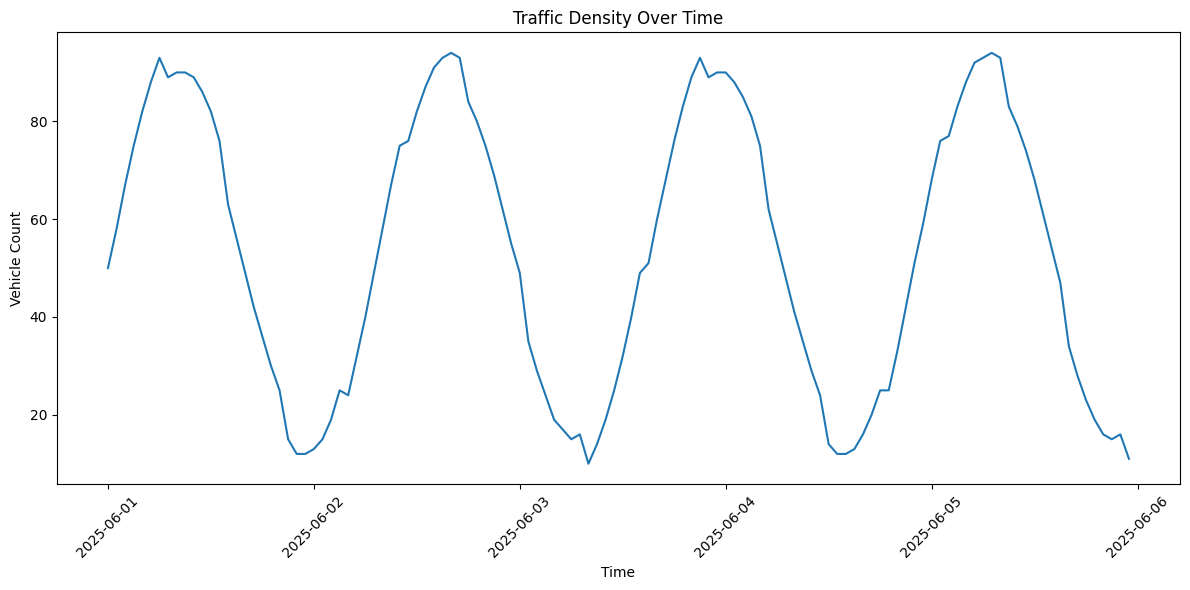

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='timestamp', y='vehicle_count')
plt.title('Traffic Density Over Time')
plt.xlabel('Time')
plt.ylabel('Vehicle Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 # Identify Peak Traffic Hours

C:\Users\Sandipan Jana\AppData\Local\Temp\ipykernel_19248\2054075081.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_avg.index, y=hourly_avg.values, palette='coolwarm')


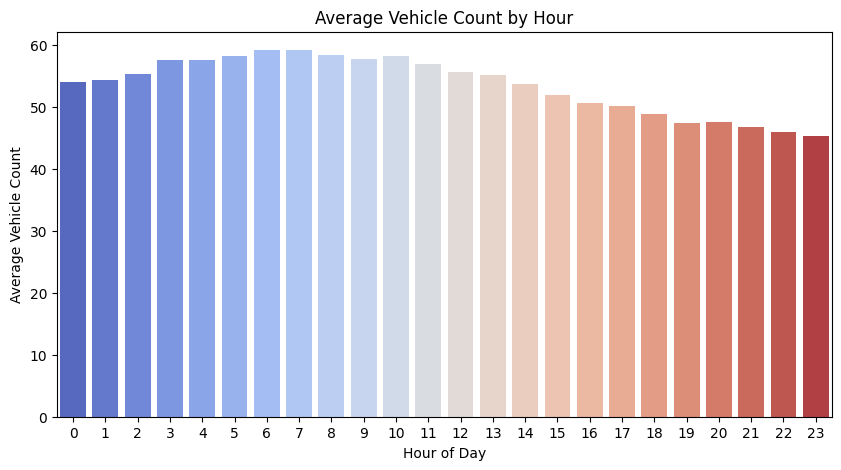

🚦 Peak Traffic Hour: 6:00 with average count 59.20


In [9]:
hourly_avg = df.groupby('hour')['vehicle_count'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=hourly_avg.index, y=hourly_avg.values, palette='coolwarm')
plt.title('Average Vehicle Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Vehicle Count')
plt.show()

peak_hour = hourly_avg.idxmax()
print(f"🚦 Peak Traffic Hour: {peak_hour}:00 with average count {hourly_avg.max():.2f}")


#  Predict Future Traffic with Linear Regression

In [11]:
df['time_index'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds() / 3600


X = df[['time_index']]
y = df['vehicle_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)




# plot

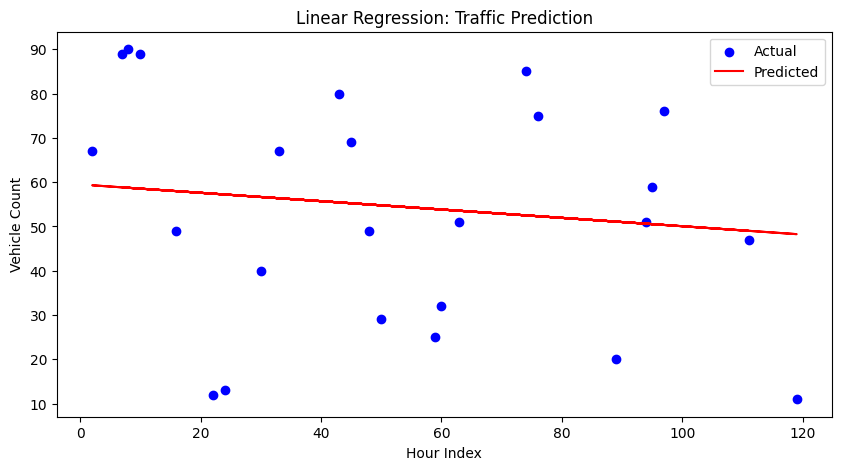

📉 MSE: 618.16


In [12]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Traffic Prediction')
plt.xlabel('Hour Index')
plt.ylabel('Vehicle Count')
plt.legend()
plt.show()

print(f"📉 MSE: {mean_squared_error(y_test, y_pred):.2f}")

# Detect Traffic Anomalies

In [13]:
mean = df['vehicle_count'].mean()
std = df['vehicle_count'].std()

# Consider anomalies where value deviates more than 2 std
anomalies = df[(df['vehicle_count'] > mean + 2*std) | (df['vehicle_count'] < mean - 2*std)]

print("⚠ Detected Anomalies:")
print(anomalies[['timestamp', 'vehicle_count']])

⚠ Detected Anomalies:
Empty DataFrame
Columns: [timestamp, vehicle_count]
Index: []
